In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "VOW3.DE"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': 'Berliner Ring 2',
 'city': 'Wolfsburg',
 'zip': '38440',
 'country': 'Germany',
 'phone': '49 5361 9 0',
 'fax': '49 5361 9 28282',
 'website': 'https://www.volkswagen-group.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Volkswagen AG manufactures and sells automobiles in Germany, other European countries, North America, South America, the Asia-Pacific, and internationally. It operates through four segments: Passenger Cars and Light Commercial Vehicles, Commercial Vehicles, Power Engineering, and Financial Services. The Passenger Cars and Light Commercial Vehicles segment engages in the development of vehicles, engines, motors, vehicle software and batteries; produces and sells passenger cars and light commercial vehicles, and related parts; and offers motorcycles. The Commerc

In [6]:
market_cap = stock_info['marketCap']
market_cap

54615912448

In [7]:
exchange = stock_info['exchange']
exchange

'GER'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

1266485

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

1539185

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

101.45

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

99.7758

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

95.08185

In [13]:
trailingPE = stock_info['trailingPE']
trailingPE

4.7495317

In [14]:
forwardPE = stock_info['forwardPE']
forwardPE

3.772778

In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

0.30199024

In [16]:
priceToSalesTrailing12Months = stock_info['priceToSalesTrailing12Months']
priceToSalesTrailing12Months

0.16822702

In [17]:
currentRatio = stock_info['currentRatio']
currentRatio

1.13

In [18]:
trailingEps = stock_info['trailingEps']
trailingEps

21.36

In [19]:
forwardEps = stock_info['forwardEps']
forwardEps

26.89

In [20]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

-0.319


In [21]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred") 

1.238


In [22]:
recommendationKey = stock_info['recommendationKey']
recommendationKey

'buy'

In [23]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

10


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [24]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.00000
institutionsPercentHeld         0.22737
institutionsFloatPercentHeld    0.22737
institutionsCount             429.00000


In [25]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                Holder  pctHeld  Shares  Value  pctChange
0    2024-12-31  Pacer Advisors, Inc.      0.0     396  40174     0.0051


In [26]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                           Holder  pctHeld  \
0    2024-10-31    Vanguard Total International Stock Index Fund   0.0124   
1    2024-12-31            Vanguard Developed Markets Index Fund   0.0077   
2    2025-01-31                       iShares Core MSCI EAFE ETF   0.0063   
3    2024-12-31  Price (T.Rowe) International Value Equity Trust   0.0048   
4    2024-12-31    T. Rowe Price International Value Equity Fund   0.0039   
5    2025-01-31                            iShares MSCI EAFE ETF   0.0033   
6    2024-12-31                 T. Rowe Price Equity Income Fund   0.0032   
7    2025-01-31                Fidelity International Index Fund   0.0031   
8    2024-11-30      Schwab Fundamental International Equity ETF   0.0031   
9    2025-01-31        iShares International Select Dividend ETF   0.0027   

    Shares      Value  pctChange  
0  2550333  258731275     0.0053  
1  1583252  160620910     0.0125  
2  1297647  131646284     0.0039  
3   983069  

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Quarterly Balance Sheet Statement

In [27]:
quarterly_balance_sheet_df = stock.quarterly_balance_sheet
quarterly_balance_sheet_df

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Ordinary Shares Number,501295263.0,501295263.0,501295263.0,501295263.0,501295263.0,NaN,NaN
Share Issued,501295263.0,501295263.0,501295263.0,501295263.0,501295263.0,NaN,NaN
Net Debt,149048000000.0,138755000000.0,143789000000.0,137231000000.0,144030000000.0,NaN,NaN
Total Debt,196520000000.0,196912000000.0,200981000000.0,195241000000.0,193972000000.0,NaN,NaN
Tangible Book Value,88961000000.0,86097000000.0,86873000000.0,89493000000.0,85859000000.0,NaN,NaN
Invested Capital,371638000000.0,367271000000.0,372242000000.0,368385000000.0,362447000000.0,NaN,NaN
Working Capital,28192000000.0,33767000000.0,31595000000.0,35751000000.0,33608000000.0,NaN,NaN
Net Tangible Assets,88961000000.0,86097000000.0,86873000000.0,89493000000.0,85859000000.0,NaN,NaN
Capital Lease Obligations,7176000000.0,6765000000.0,6801000000.0,6825000000.0,6493000000.0,NaN,NaN
Common Stock Equity,182294000000.0,177124000000.0,178062000000.0,179969000000.0,174968000000.0,NaN,NaN


In [28]:
quarterly_balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, Ordinary Shares Number to Cash Financial
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2024-12-31 00:00:00  80 non-null     object
 1   2024-09-30 00:00:00  54 non-null     object
 2   2024-06-30 00:00:00  55 non-null     object
 3   2024-03-31 00:00:00  53 non-null     object
 4   2023-12-31 00:00:00  80 non-null     object
 5   2023-09-30 00:00:00  1 non-null      object
 6   2023-06-30 00:00:00  2 non-null      object
dtypes: object(7)
memory usage: 5.0+ KB


## 3.1 Retained Earnings

In [29]:
try:
  retained_earnings = quarterly_balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

           Retained Earnings
2024-12-31    155130000000.0
2024-09-30    151784000000.0
2024-06-30    151178000000.0
2024-03-31    151732000000.0
2023-12-31    147104000000.0
2023-09-30               NaN
2023-06-30               NaN


In [30]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(quarterly_balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = quarterly_balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 

[2.204448426711643, 0.40085197581658705, -0.36511744391426987, 3.1460735262127475, nan, nan]


In [31]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

            % Change in Retained Earnings
2024-12-31                       2.204448
2024-09-30                       0.400852
2024-06-30                      -0.365117
2024-03-31                       3.146074
2023-12-31                            NaN
2023-09-30                            NaN


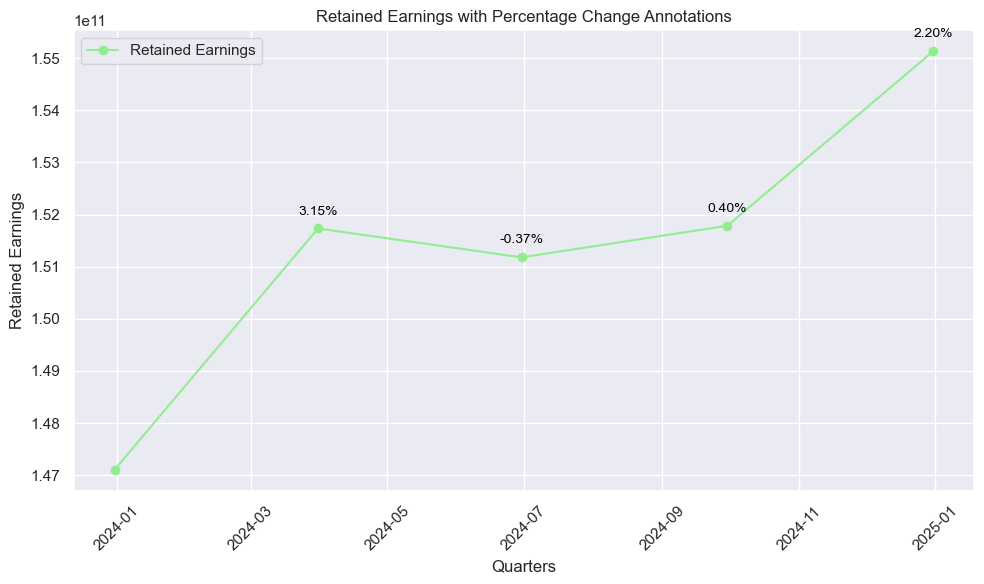

In [32]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Quarters')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 3.2 Liabilities

In [33]:
balance_df_liabilities = quarterly_balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Current Liabilities','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Payables,35984000000.0,32402000000.0,31580000000.0,32014000000.0,36643000000.0,NaN,NaN
Current Debt And Capital Lease Obligation,63387000000.0,68270000000.0,78018000000.0,73521000000.0,74887000000.0,NaN,NaN
Current Liabilities,217039000000.0,224444000000.0,228924000000.0,220342000000.0,206036000000.0,NaN,NaN
Long Term Debt And Capital Lease Obligation,133133000000.0,128642000000.0,122963000000.0,121720000000.0,119085000000.0,NaN,NaN
Total Capitalization,309503000000.0,300207000000.0,295418000000.0,296050000000.0,288672000000.0,NaN,NaN


In [34]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 03.2024,03.2024 vs 12.2023,12.2023 vs 09.2023,09.2023 vs 06.2023
Payables,11.054873,2.602913,-1.355657,-12.632699,NaN,NaN
Current Debt And Capital Lease Obligation,-7.152483,-12.494553,6.116620,-1.824082,NaN,NaN
Current Liabilities,-3.299264,-1.956981,3.894854,6.943447,NaN,NaN
Long Term Debt And Capital Lease Obligation,3.491084,4.618462,1.021196,2.212705,NaN,NaN
Total Capitalization,3.096530,1.621093,-0.213477,2.555842,NaN,NaN


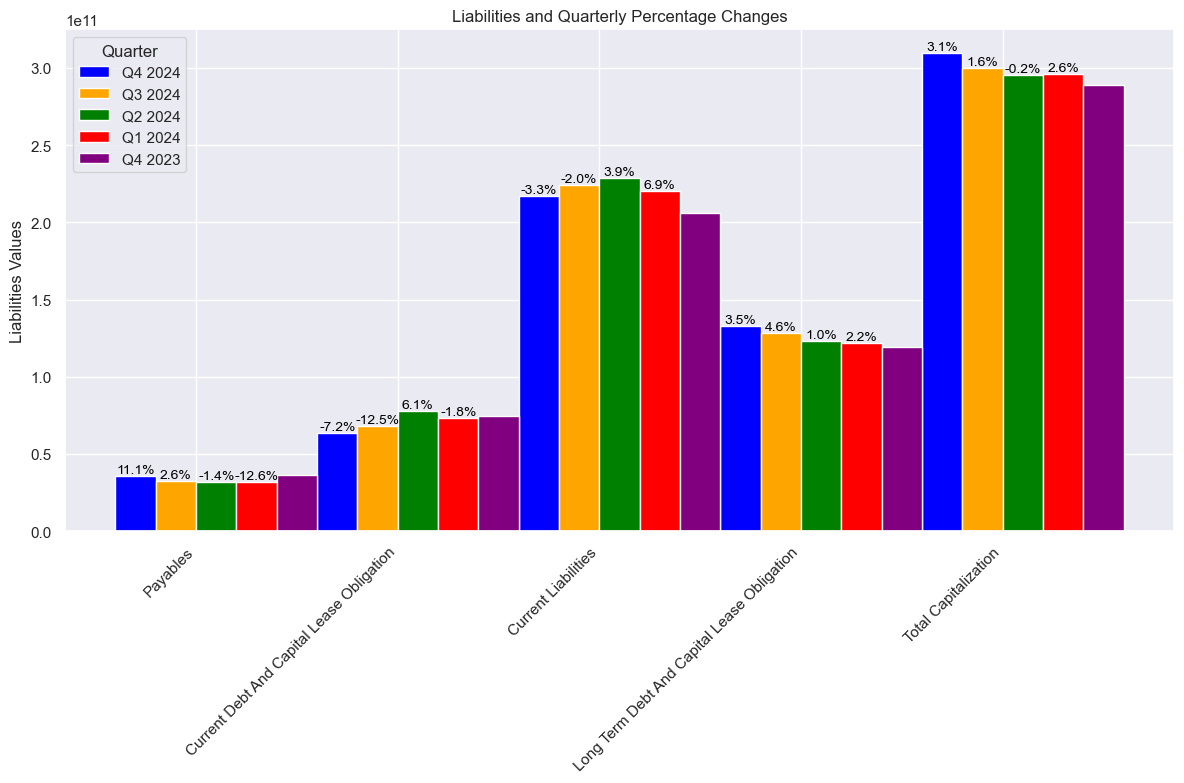

In [35]:
# Convert columns to string format "MM.YYYY"
column_strings = [col.strftime('%m.%Y') for col in balance_df_liabilities.columns]

# Extract quarter and year manually
quarter_columns = [f"Q{(int(col[:2])-1)//3 + 1} {col[3:]}" for col in column_strings]

# Dynamically generate column names with quarter and year
pct_diff_balance_df_liabilities.columns = [f"{quarter_columns[i]} vs {quarter_columns[i+1]}" for i in range(len(quarter_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=quarter_columns[i], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liabilities Values")
ax.set_title("Liabilities and Quarterly Percentage Changes")
ax.legend(title="Quarter")
plt.tight_layout()
plt.show()


## 3.3 Assets 

In [36]:
balance_df_assets = quarterly_balance_sheet_df.loc[['Accounts Receivable','Cash And Cash Equivalents','Current Assets','Net PPE','Goodwill And Other Intangible Assets']]
balance_df_assets

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Accounts Receivable,67687000000.0,88650000000.0,90733000000.0,89358000000.0,67203000000.0,NaN,NaN
Cash And Cash Equivalents,40296000000.0,51392000000.0,50391000000.0,51185000000.0,43449000000.0,NaN,NaN
Current Assets,245231000000.0,258211000000.0,260519000000.0,256093000000.0,239644000000.0,NaN,NaN
Net PPE,144644000000.0,137414000000.0,135213000000.0,132933000000.0,130975000000.0,NaN,NaN
Goodwill And Other Intangible Assets,93333000000.0,91027000000.0,91189000000.0,90476000000.0,89109000000.0,NaN,NaN


In [37]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 03.2024,03.2024 vs 12.2023,12.2023 vs 09.2023,09.2023 vs 06.2023
Accounts Receivable,-23.646926,-2.295747,1.538754,32.967278,NaN,NaN
Cash And Cash Equivalents,-21.590909,1.986466,-1.551236,17.804783,NaN,NaN
Current Assets,-5.026897,-0.885924,1.728278,6.863931,NaN,NaN
Net PPE,5.261473,1.627802,1.715150,1.494942,NaN,NaN
Goodwill And Other Intangible Assets,2.533314,-0.177653,0.788054,1.534076,NaN,NaN


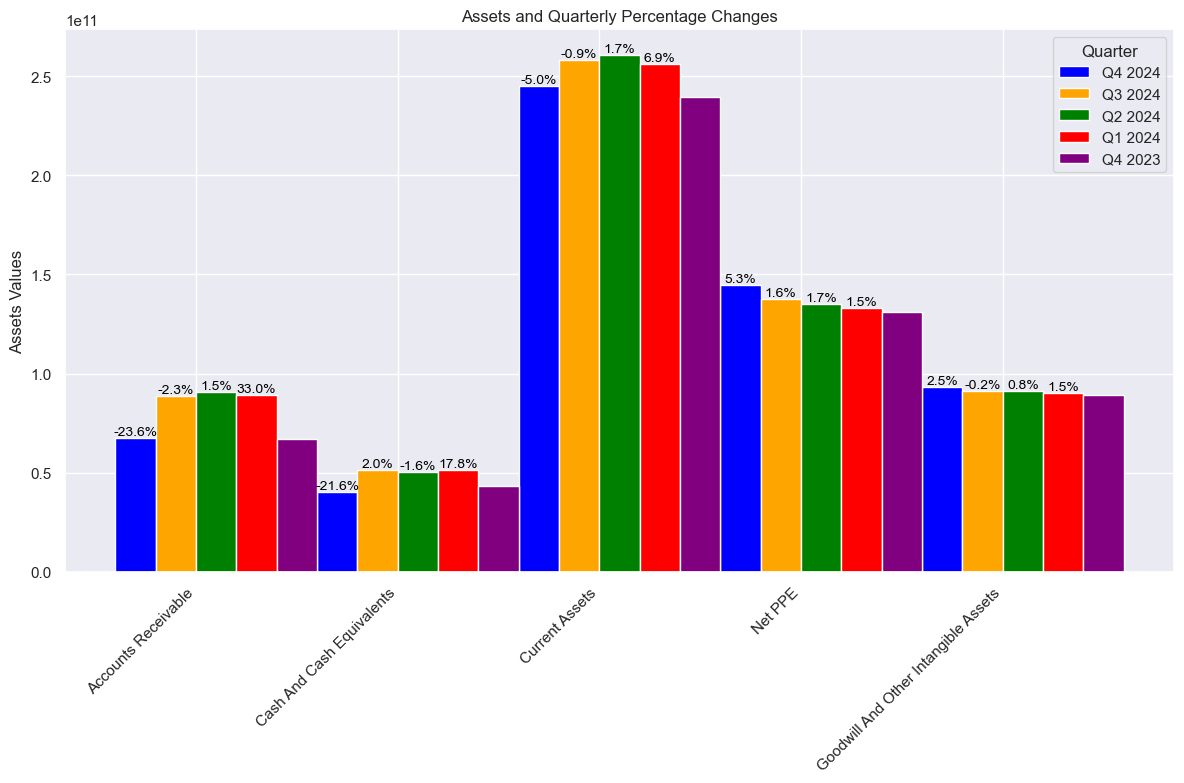

In [38]:
# Convert columns to string format "MM.YYYY"
column_strings = [col.strftime('%m.%Y') for col in balance_df_assets.columns]

# Extract quarter and year manually
quarter_columns = [f"Q{(int(col[:2])-1)//3 + 1} {col[3:]}" for col in column_strings]

# Dynamically generate column names with quarter and year
pct_diff_balance_df_assets.columns = [f"{quarter_columns[i]} vs {quarter_columns[i+1]}" for i in range(len(quarter_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=quarter_columns[i], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Quarterly Percentage Changes")
ax.legend(title="Quarter")
plt.tight_layout()
plt.show()

## 3.4 Balance Sheet for the last quarter with Vertical Analysis

In [39]:
balance_sheet_df = pd.DataFrame(stock.quarterly_balance_sheet)
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2024-12-31
Ordinary Shares Number,501295263.0
Share Issued,501295263.0
Net Debt,149048000000.0
Total Debt,196520000000.0
Tangible Book Value,88961000000.0
Invested Capital,371638000000.0
Working Capital,28192000000.0
Net Tangible Assets,88961000000.0
Capital Lease Obligations,7176000000.0
Common Stock Equity,182294000000.0


In [40]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,501295263.0,0.079205
Share Issued,501295263.0,0.079205
Net Debt,149048000000.0,23.549822
Total Debt,196520000000.0,31.050474
Tangible Book Value,88961000000.0,14.05598
Invested Capital,371638000000.0,58.719397
Working Capital,28192000000.0,4.454381
Net Tangible Assets,88961000000.0,14.05598
Capital Lease Obligations,7176000000.0,1.133819
Common Stock Equity,182294000000.0,28.802743


## 3.5 Balance Sheet for the previous quarter with Vertical Analysis

In [41]:
balance_sheet_df = pd.DataFrame(stock.quarterly_balance_sheet)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2024-09-30
Ordinary Shares Number,501295263.0
Share Issued,501295263.0
Net Debt,138755000000.0
Total Debt,196912000000.0
Tangible Book Value,86097000000.0
Invested Capital,367271000000.0
Working Capital,33767000000.0
Net Tangible Assets,86097000000.0
Capital Lease Obligations,6765000000.0
Common Stock Equity,177124000000.0


In [42]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2024-09-30 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,501295263.0,0.079391
Share Issued,501295263.0,0.079391
Net Debt,138755000000.0,21.974759
Total Debt,196912000000.0,31.185137
Tangible Book Value,86097000000.0,13.635262
Invested Capital,367271000000.0,58.165051
Working Capital,33767000000.0,5.347711
Net Tangible Assets,86097000000.0,13.635262
Capital Lease Obligations,6765000000.0,1.071379
Common Stock Equity,177124000000.0,28.051293


## 3.6 Balance Sheet for the last two quarters with Vertical Analysis

In [43]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities,2024-09-30 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,501295263.0,0.079205,501295263.0,0.079391
Share Issued,501295263.0,0.079205,501295263.0,0.079391
Net Debt,149048000000.0,23.549822,138755000000.0,21.974759
Total Debt,196520000000.0,31.050474,196912000000.0,31.185137
Tangible Book Value,88961000000.0,14.05598,86097000000.0,13.635262
Invested Capital,371638000000.0,58.719397,367271000000.0,58.165051
Working Capital,28192000000.0,4.454381,33767000000.0,5.347711
Net Tangible Assets,88961000000.0,14.05598,86097000000.0,13.635262
Capital Lease Obligations,7176000000.0,1.133819,6765000000.0,1.071379
Common Stock Equity,182294000000.0,28.802743,177124000000.0,28.051293


In [44]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings']
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         155130000000.0
Percentage from Total Assets/Liabilities         24.510788
2024-09-30 00:00:00                         151784000000.0
Percentage from Total Assets/Liabilities         24.038174
Name: Retained Earnings, dtype: object


In [45]:
df_concat_balance.loc['Total Capitalization']

2024-12-31 00:00:00                         309503000000.0
Percentage from Total Assets/Liabilities         48.901968
2024-09-30 00:00:00                         300207000000.0
Percentage from Total Assets/Liabilities         47.544063
Name: Total Capitalization, dtype: object

In [46]:
df_concat_balance.loc['Net PPE']

2024-12-31 00:00:00                         144644000000.0
Percentage from Total Assets/Liabilities         22.853983
2024-09-30 00:00:00                         137414000000.0
Percentage from Total Assets/Liabilities         21.762383
Name: Net PPE, dtype: object

In [47]:
df_concat_balance.loc['Long Term Debt And Capital Lease Obligation']

2024-12-31 00:00:00                         133133000000.0
Percentage from Total Assets/Liabilities         21.035226
2024-09-30 00:00:00                         128642000000.0
Percentage from Total Assets/Liabilities         20.373154
Name: Long Term Debt And Capital Lease Obligation, dtype: object

In [48]:
df_concat_balance.loc['Goodwill']

2024-12-31 00:00:00                         26376000000.0
Percentage from Total Assets/Liabilities          4.16745
2024-09-30 00:00:00                                   NaN
Percentage from Total Assets/Liabilities              NaN
Name: Goodwill, dtype: object

In [49]:
df_concat_balance.loc['Current Liabilities']

2024-12-31 00:00:00                         217039000000.0
Percentage from Total Assets/Liabilities         34.292508
2024-09-30 00:00:00                         224444000000.0
Percentage from Total Assets/Liabilities         35.545406
Name: Current Liabilities, dtype: object

In [50]:
df_concat_balance.loc['Cash And Cash Equivalents']

2024-12-31 00:00:00                         40296000000.0
Percentage from Total Assets/Liabilities         6.366832
2024-09-30 00:00:00                         51392000000.0
Percentage from Total Assets/Liabilities         8.138999
Name: Cash And Cash Equivalents, dtype: object

In [51]:
df_concat_balance.loc['Taxes Receivable']

2024-12-31 00:00:00                         8177000000.0
Percentage from Total Assets/Liabilities        1.291979
2024-09-30 00:00:00                                  NaN
Percentage from Total Assets/Liabilities             NaN
Name: Taxes Receivable, dtype: object

In [52]:
df_concat_balance.loc['Accounts Receivable']

2024-12-31 00:00:00                         67687000000.0
Percentage from Total Assets/Liabilities        10.694654
2024-09-30 00:00:00                         88650000000.0
Percentage from Total Assets/Liabilities        14.039583
Name: Accounts Receivable, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Quarterly Cash Flow Statement

In [53]:
cash_flow = stock.quarterly_cash_flow
cash_flow

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Free Cash Flow,-4761000000.0,1160000000.0,-2839000000.0,-3855000000.0,-2218000000.0,NaN,NaN
Repayment Of Debt,-17816000000.0,-5783000000.0,-10051000000.0,-7308000000.0,-13704000000.0,NaN,NaN
Issuance Of Debt,23078000000.0,6136000000.0,9975000000.0,12353000000.0,13002000000.0,NaN,NaN
Capital Expenditure,-10086000000.0,-6179000000.0,-5560000000.0,-5621000000.0,-9014000000.0,NaN,NaN
End Cash Position,40296000000.0,51397000000.0,50398000000.0,51191000000.0,43522000000.0,NaN,NaN
Beginning Cash Position,51397000000.0,50398000000.0,51191000000.0,43522000000.0,45704000000.0,NaN,NaN
Effect Of Exchange Rate Changes,359000000.0,-295000000.0,-109000000.0,100000000.0,-1162000000.0,NaN,NaN
Changes In Cash,-11460000000.0,1296000000.0,-686000000.0,7569000000.0,-1018000000.0,NaN,NaN
Other Cash Adjustment Inside Changein Cash,1000000.0,-1000000.0,0.0,1000000.0,-1000000.0,NaN,NaN
Financing Cash Flow,-4658000000.0,0.0,3769000000.0,12029000000.0,4285000000.0,NaN,NaN


## 4.1 Free Cash Flow

In [54]:
try:
    free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow']).dropna()
    print(free_cash_flow)
except:
    print("An exception occurred")

           Free Cash Flow
2024-12-31  -4761000000.0
2024-09-30   1160000000.0
2024-06-30  -2839000000.0
2024-03-31  -3855000000.0
2023-12-31  -2218000000.0


In [55]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30
% Change in Free Cash Flow,-510.431034,-140.859458,-26.355383,73.80523,NaN,NaN


In [56]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2024-12-31,-510.431034
2024-09-30,-140.859458
2024-06-30,-26.355383
2024-03-31,73.805230
2023-12-31,NaN
2023-09-30,NaN


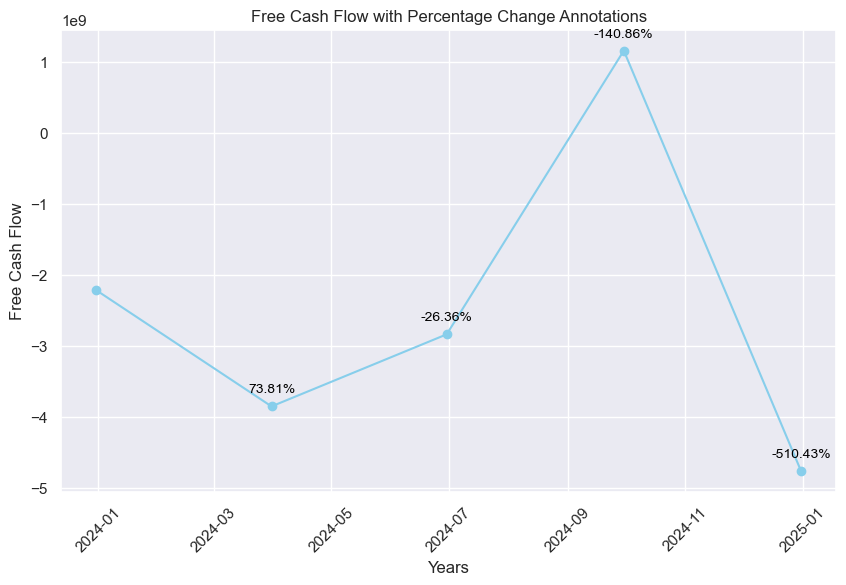

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 4.2 Cash Flow DF

In [58]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Operating Cash Flow,5325000000.0,7339000000.0,2721000000.0,1766000000.0,6796000000.0,NaN,NaN
Investing Cash Flow,-12128000000.0,-6042000000.0,-7176000000.0,-6227000000.0,-12098000000.0,NaN,NaN
Financing Cash Flow,-4658000000.0,0.0,3769000000.0,12029000000.0,4285000000.0,NaN,NaN


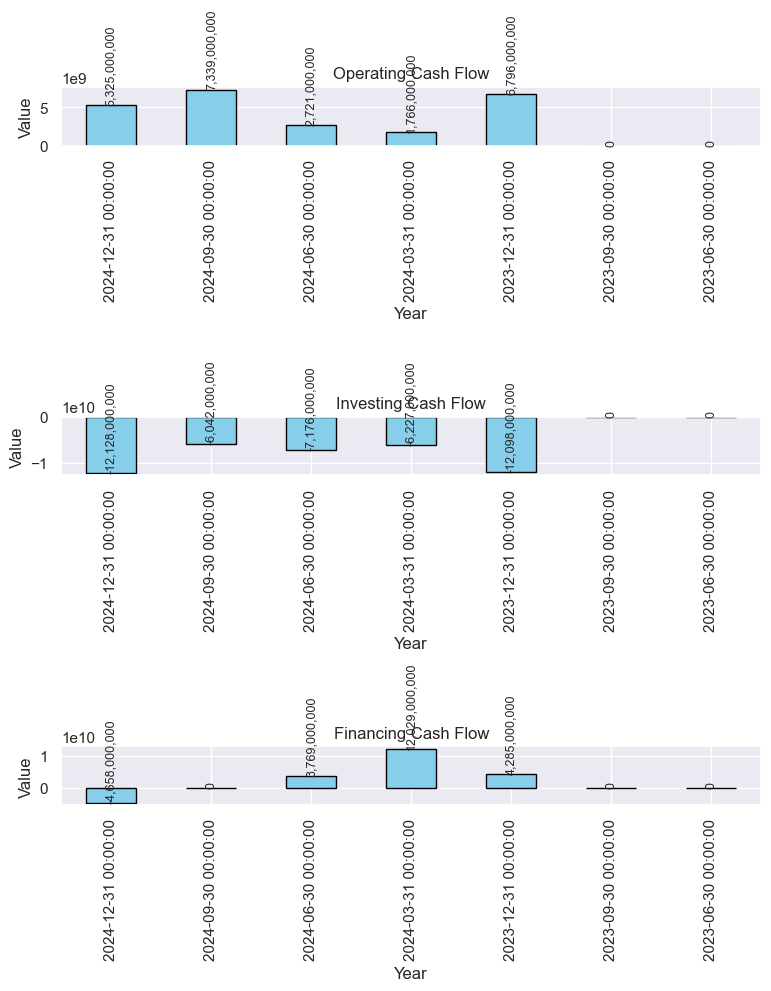

In [59]:
transposed_cash_flow_df = cash_flow_df.T

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 4.3 Percentage changes in Cash Flow DF

In [60]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2024 vs 2024,2024 vs 2024,2024 vs 2024,2024 vs 2023,2023 vs 2023,2023 vs 2023
Operating Cash Flow,-27.442431,169.717016,54.077010,-74.014126,NaN,NaN
Investing Cash Flow,100.728236,-15.802676,15.240084,-48.528682,NaN,NaN
Financing Cash Flow,NaN,-100.000000,-68.667387,180.723454,NaN,NaN


In [61]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2024 vs 2024,-27.442431,100.728236,NaN
2024 vs 2024,169.717016,-15.802676,-100.000000
2024 vs 2024,54.077010,15.240084,-68.667387
2024 vs 2023,-74.014126,-48.528682,180.723454
2023 vs 2023,NaN,NaN,NaN
2023 vs 2023,NaN,NaN,NaN


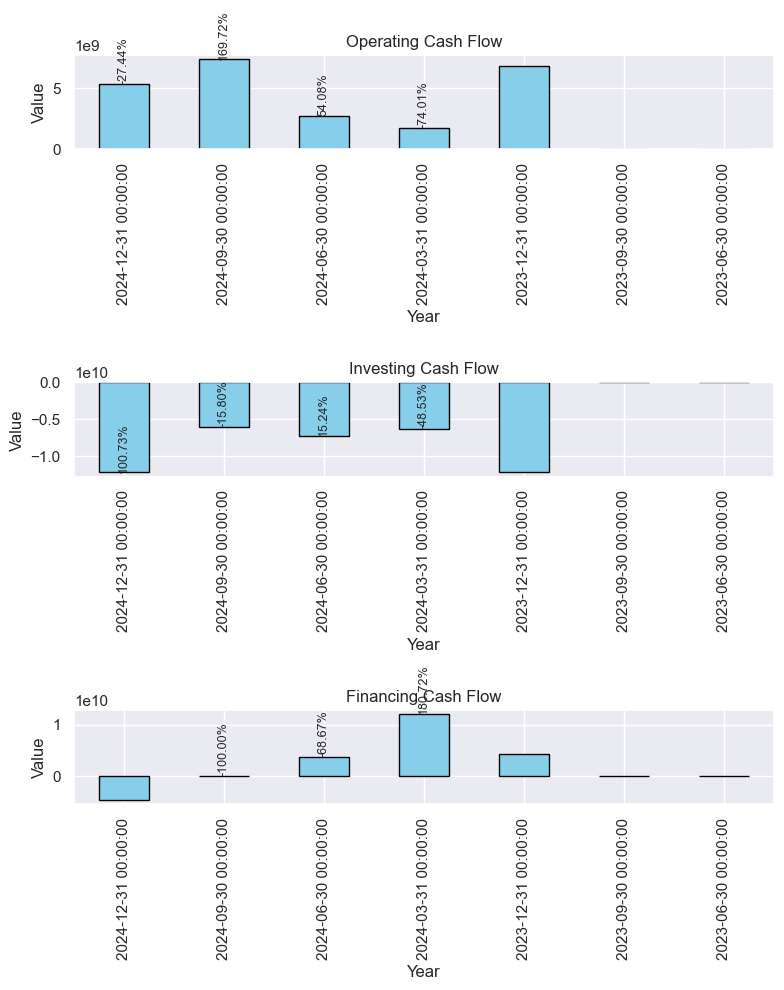

In [62]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

## 5. Quarterly Income Statement

In [63]:
income_statement = pd.DataFrame(stock.quarterly_income_stmt).astype(float)
income_statement

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
Tax Rate For Calcs,1.877190e-01,3.310700e-01,2.717610e-01,2.839220e-01,7.899500e-02,NaN,NaN
Normalized EBITDA,1.596100e+10,1.098800e+10,1.280700e+10,1.184300e+10,1.705200e+10,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,3.286000e+09,1.366000e+09,3.270000e+09,3.429000e+09,4.829000e+09,NaN,NaN
Reconciled Depreciation,8.614000e+09,8.134000e+09,7.343000e+09,7.255000e+09,6.510000e+09,NaN,NaN
Reconciled Cost Of Revenue,7.029000e+10,6.542000e+10,6.755800e+10,6.191500e+10,7.048500e+10,NaN,NaN
EBITDA,1.596100e+10,1.098800e+10,1.280700e+10,1.184300e+10,1.705200e+10,NaN,NaN
EBIT,7.347000e+09,2.854000e+09,5.464000e+09,4.588000e+09,1.054200e+10,NaN,NaN
Net Interest Income,-3.350000e+08,-9.150000e+08,-2.850000e+08,3.340000e+08,-6.140000e+08,NaN,NaN
Interest Expense,NaN,NaN,NaN,NaN,NaN,NaN,5.020000e+08


## 5.1 Income Statement DF

In [64]:
income_statement_df = income_statement.loc[['Total Revenue','Total Expenses','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Total Revenue,8.737800e+10,7.847800e+10,8.333900e+10,7.546100e+10,8.718200e+10,NaN,NaN
Total Expenses,8.112900e+10,7.562400e+10,7.787500e+10,7.087300e+10,7.774000e+10,NaN,NaN
Net Income Common Stockholders,3.131000e+09,1.212000e+09,3.112000e+09,3.266000e+09,4.665000e+09,NaN,NaN
Diluted EPS,NaN,2.420000e+00,6.210000e+00,6.490000e+00,NaN,7.76,6.48


In [65]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%m.%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,12.2024 vs 09.2024,09.2024 vs 06.2024,06.2024 vs 03.2024,03.2024 vs 12.2023,12.2023 vs 09.2023,09.2023 vs 06.2023
Total Revenue,11.340758,-5.832803,10.439830,-13.444289,NaN,NaN
Total Expenses,7.279435,-2.890530,9.879644,-8.833290,NaN,NaN
Net Income Common Stockholders,158.333333,-61.053985,-4.715248,-29.989282,NaN,NaN
Diluted EPS,NaN,-61.030596,-4.314330,NaN,NaN,19.753086


In [66]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,Total Expenses,Net Income Common Stockholders,Diluted EPS
2024-12-31,8.737800e+10,8.112900e+10,3.131000e+09,NaN
2024-09-30,7.847800e+10,7.562400e+10,1.212000e+09,2.42
2024-06-30,8.333900e+10,7.787500e+10,3.112000e+09,6.21
2024-03-31,7.546100e+10,7.087300e+10,3.266000e+09,6.49
2023-12-31,8.718200e+10,7.774000e+10,4.665000e+09,NaN
2023-09-30,NaN,NaN,NaN,7.76
2023-06-30,NaN,NaN,NaN,6.48


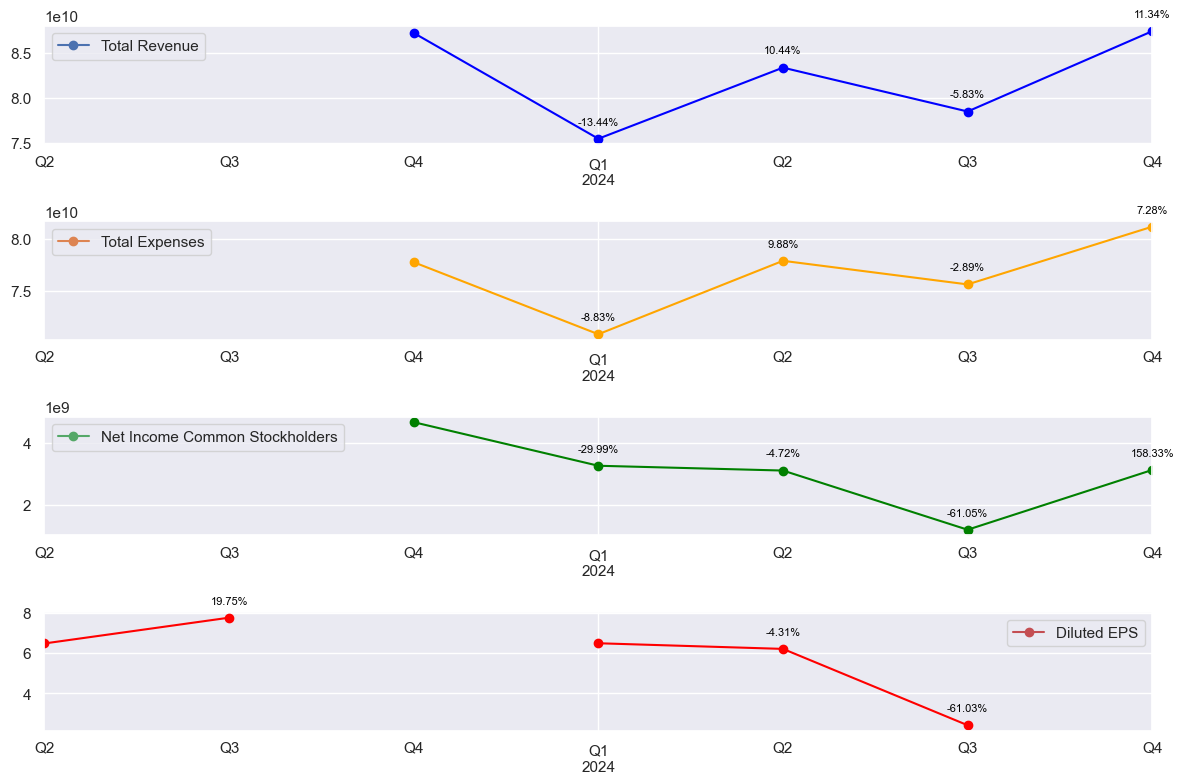

In [67]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(12, 8), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

    # Add percentage change annotations from pct_diff_income_statement_df
    for i, (x, y) in enumerate(zip(transposed_df_income.index, transposed_df_income.iloc[:, idx])):
        if i < len(pct_diff_income_statement_df.columns):  # Ensure we don't go out of bounds
            pct_change = pct_diff_income_statement_df.iloc[idx, i]  # Get percentage change value
            if not pd.isna(pct_change):  # Only annotate if the value is not NaN
                # Use the actual x value from the plot for annotation
                axis.annotate(
                    f'{pct_change:.2f}%', 
                    (x, y),  # Use the actual x value from the plot
                    textcoords="offset points", 
                    xytext=(0, 10),  # Position the annotation 10 points above the data point
                    ha='center',  # Center the annotation horizontally
                    fontsize=8,  # Adjust font size if needed
                    color='black'  # Set annotation color
                )

plt.tight_layout()
plt.show()

## 5.2 Income Statement for the last quarter with Vertical Analysis

In [68]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2024-12-31
Tax Effect Of Unusual Items,0.000000e+00
Tax Rate For Calcs,1.877190e-01
Normalized EBITDA,1.596100e+10
Net Income From Continuing Operation Net Minority Interest,3.286000e+09
Reconciled Depreciation,8.614000e+09
Reconciled Cost Of Revenue,7.029000e+10
EBITDA,1.596100e+10
EBIT,7.347000e+09
Net Interest Income,-3.350000e+08
Interest Expense,NaN


In [69]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2024-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.877190e-01,2.148355e-10
Normalized EBITDA,1.596100e+10,1.826661e+01
Net Income From Continuing Operation Net Minority Interest,3.286000e+09,3.760672e+00
Reconciled Depreciation,8.614000e+09,9.858317e+00
Reconciled Cost Of Revenue,7.029000e+10,8.044359e+01
EBITDA,1.596100e+10,1.826661e+01
EBIT,7.347000e+09,8.408295e+00
Net Interest Income,-3.350000e+08,-3.833917e-01
Interest Expense,NaN,NaN


## 5.3 Income Statement for the previous quarter with Vertical Analysis

In [70]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2024-09-30
Tax Effect Of Unusual Items,0.000000e+00
Tax Rate For Calcs,3.310700e-01
Normalized EBITDA,1.098800e+10
Net Income From Continuing Operation Net Minority Interest,1.366000e+09
Reconciled Depreciation,8.134000e+09
Reconciled Cost Of Revenue,6.542000e+10
EBITDA,1.098800e+10
EBIT,2.854000e+09
Net Interest Income,-9.150000e+08
Interest Expense,NaN


In [71]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2024-09-30 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00
Tax Rate For Calcs,3.310700e-01,4.218635e-10
Normalized EBITDA,1.098800e+10,1.400138e+01
Net Income From Continuing Operation Net Minority Interest,1.366000e+09,1.740615e+00
Reconciled Depreciation,8.134000e+09,1.036469e+01
Reconciled Cost Of Revenue,6.542000e+10,8.336094e+01
EBITDA,1.098800e+10,1.400138e+01
EBIT,2.854000e+09,3.636688e+00
Net Interest Income,-9.150000e+08,-1.165932e+00
Interest Expense,NaN,NaN


## 5.4 Income Statement for the last two quarters with Vertical Analysis

In [72]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2024-12-31 00:00:00,Percentage from Operating Revenue,2024-09-30 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.877190e-01,2.148355e-10,3.310700e-01,4.218635e-10
Normalized EBITDA,1.596100e+10,1.826661e+01,1.098800e+10,1.400138e+01
Net Income From Continuing Operation Net Minority Interest,3.286000e+09,3.760672e+00,1.366000e+09,1.740615e+00
Reconciled Depreciation,8.614000e+09,9.858317e+00,8.134000e+09,1.036469e+01
Reconciled Cost Of Revenue,7.029000e+10,8.044359e+01,6.542000e+10,8.336094e+01
EBITDA,1.596100e+10,1.826661e+01,1.098800e+10,1.400138e+01
EBIT,7.347000e+09,8.408295e+00,2.854000e+09,3.636688e+00
Net Interest Income,-3.350000e+08,-3.833917e-01,-9.150000e+08,-1.165932e+00
Interest Expense,NaN,NaN,NaN,NaN


In [73]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  87378000000.000000
Percentage from Operating Revenue            100.000000
2024-09-30 00:00:00                  78478000000.000000
Percentage from Operating Revenue            100.000000
Name: Operating Revenue, dtype: object

In [74]:
df_concat_income.loc['Cost Of Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2024-12-31 00:00:00                  70290000000.000000
Percentage from Operating Revenue             80.443590
2024-09-30 00:00:00                  65420000000.000000
Percentage from Operating Revenue             83.360942
Name: Cost Of Revenue, dtype: object

In [75]:
df_concat_income.loc['Gross Profit'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  17088000000.000000
Percentage from Operating Revenue             19.556410
2024-09-30 00:00:00                  13058000000.000000
Percentage from Operating Revenue             16.639058
Name: Gross Profit, dtype: object

In [76]:
df_concat_income.loc['Operating Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  10839000000.000000
Percentage from Operating Revenue             12.404724
2024-09-30 00:00:00                  10204000000.000000
Percentage from Operating Revenue             13.002370
Name: Operating Expense, dtype: object

In [77]:
df_concat_income.loc['Operating Income'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  6249000000.000000
Percentage from Operating Revenue             7.151686
2024-09-30 00:00:00                  2854000000.000000
Percentage from Operating Revenue             3.636688
Name: Operating Income, dtype: object

In [78]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  3131000000.000000
Percentage from Operating Revenue             3.583282
2024-09-30 00:00:00                  1212000000.000000
Percentage from Operating Revenue             1.544382
Name: Net Income Common Stockholders, dtype: object

In [79]:
df_concat_income.loc['EBITDA'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  15961000000.000000
Percentage from Operating Revenue             18.266612
2024-09-30 00:00:00                  10988000000.000000
Percentage from Operating Revenue             14.001376
Name: EBITDA, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Ratio Analysis

__Gross Profit Margin__

In [80]:
gross_profit_margin = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Cost Of Revenue'].replace(0, np.nan).astype(float)) / income_statement_df.loc['Total Revenue'].replace(0, np.nan).astype(float) * 100
gross_profit_margin

2024-12-31    19.556410
2024-09-30    16.639058
2024-06-30    18.935912
2024-03-31    17.950995
2023-12-31    19.151889
2023-09-30          NaN
2023-06-30          NaN
dtype: float64

__Operating Profit Margin__

In [81]:
operating_profit_margin = (income_statement.loc['Operating Income'].replace(0, np.nan).astype(float) /  income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
operating_profit_margin

2024-12-31     7.151686
2024-09-30     3.636688
2024-06-30     6.556354
2024-03-31     6.079962
2023-12-31    10.830217
2023-09-30          NaN
2023-06-30          NaN
dtype: float64

__Net Profit Margin__

In [82]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2024-12-31    3.760672
2024-09-30    1.740615
2024-06-30    3.923733
2024-03-31    4.544069
2023-12-31    5.538987
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

__Current Ratio__

In [83]:
current_ratio = balance_sheet_df.loc['Current Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Current Liabilities'].replace(0, np.nan).astype(float)
current_ratio

2024-12-31    1.129894
2024-09-30    1.150447
2024-06-30    1.138015
2024-03-31    1.162252
2023-12-31    1.163117
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

__Accounts Receivable Turnover__ <br>
The Accounts Receivable Turnover Ratio measures how efficiently a company collects its receivables. A higher ratio indicates effective collection processes and efficient use of assets.

In [84]:
ART = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Net Income'].replace(0, np.nan).astype(float)) / quarterly_balance_sheet_df.loc['Accounts Receivable'].mean() 
ART

2024-12-31    1.041694
2024-09-30    0.955229
2024-06-30    0.991859
2024-03-31    0.892300
2023-12-31    1.020152
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7.  Long-term Debt to Equity Ratio & ICR

__DE__

In [85]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2024-12-31    1.272090e+11
2024-09-30    1.230830e+11
2024-06-30    1.173560e+11
2024-03-31    1.160810e+11
2023-12-31    1.137040e+11
2023-09-30             NaN
2023-06-30             NaN
Name: Long Term Debt, dtype: float64

In [86]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2024-12-31    1.822940e+11
2024-09-30    1.771240e+11
2024-06-30    1.780620e+11
2024-03-31    1.799690e+11
2023-12-31    1.749680e+11
2023-09-30             NaN
2023-06-30             NaN
Name: Common Stock Equity, dtype: float64

In [87]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2024-12-31    0.697823
2024-09-30    0.694897
2024-06-30    0.659074
2024-03-31    0.645006
2023-12-31    0.649856
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

__ICR__

In [88]:
EBIT = income_statement.loc['EBIT'].replace(0, np.nan).astype(float)
EBIT

2024-12-31    7.347000e+09
2024-09-30    2.854000e+09
2024-06-30    5.464000e+09
2024-03-31    4.588000e+09
2023-12-31    1.054200e+10
2023-09-30             NaN
2023-06-30             NaN
Name: EBIT, dtype: float64

In [89]:
interest_expense = income_statement.loc['Interest Expense'].replace(0, np.nan).astype(float)
interest_expense

2024-12-31            NaN
2024-09-30            NaN
2024-06-30            NaN
2024-03-31            NaN
2023-12-31            NaN
2023-09-30            NaN
2023-06-30    502000000.0
Name: Interest Expense, dtype: float64

In [90]:
ICR = EBIT / interest_expense
ICR

2024-12-31   NaN
2024-09-30   NaN
2024-06-30   NaN
2024-03-31   NaN
2023-12-31   NaN
2023-09-30   NaN
2023-06-30   NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. Operating Cash to Total Debt

In [91]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    5.325000e+09
2024-09-30    7.339000e+09
2024-06-30    2.721000e+09
2024-03-31    1.766000e+09
2023-12-31    6.796000e+09
2023-09-30             NaN
2023-06-30             NaN
Name: Operating Cash Flow, dtype: float64

In [92]:
total_debt = balance_sheet_df.loc['Total Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    1.965200e+11
2024-09-30    1.969120e+11
2024-06-30    2.009810e+11
2024-03-31    1.952410e+11
2023-12-31    1.939720e+11
2023-09-30             NaN
2023-06-30             NaN
Name: Total Debt, dtype: float64

In [93]:
operating_cash_To_total_debt = operating_cash / total_debt
operating_cash_To_total_debt

2024-12-31    0.027096
2024-09-30    0.037270
2024-06-30    0.013539
2024-03-31    0.009045
2023-12-31    0.035036
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

__When Operating Cash to Debt ratio is close to 100% or 1, quick measure confirming that company has solid financials to pay off debt.__ <br>
__> 0.2 (20%)	Healthy cash flow compared to debt. The company can cover its debt more than once with its operating cash, implying solid financial health.__ <br>
__≈ 0.1 to 0.2 (10-20%)	Moderate coverage. The company generates enough cash flow, but managing its debt levels could be challenging if cash flow drops.__ <br>
__< 0.1 (10%)	Low cash flow relative to debt. The company is at risk if there are downturns, as it may struggle to meet debt obligations.__ <br>
__< 0 (negative)	Negative operating cash flow. The company is not generating enough cash from operations to cover its debt and might be relying on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. Operating Cash to Net Income 

In [94]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    5.325000e+09
2024-09-30    7.339000e+09
2024-06-30    2.721000e+09
2024-03-31    1.766000e+09
2023-12-31    6.796000e+09
2023-09-30             NaN
2023-06-30             NaN
Name: Operating Cash Flow, dtype: float64

In [95]:
net_income = income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)
net_income

2024-12-31    3.131000e+09
2024-09-30    1.212000e+09
2024-06-30    3.112000e+09
2024-03-31    3.266000e+09
2023-12-31    4.665000e+09
2023-09-30             NaN
2023-06-30             NaN
Name: Net Income Common Stockholders, dtype: float64

In [96]:
operating_cash_To_net_income = operating_cash / net_income
operating_cash_To_net_income

2024-12-31    1.700735
2024-09-30    6.055281
2024-06-30    0.874357
2024-03-31    0.540723
2023-12-31    1.456806
2023-09-30         NaN
2023-06-30         NaN
dtype: float64

__> 1 Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 1	Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 1	Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 